In [6]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [134]:
file = 'HeavySourPos_1000msig_500ppbthresh.csv'
df = pd.read_csv(file)
dfmzs = df[pd.notnull(df['Meas. m/z'])]
measured = np.array(dfmzs['Meas. m/z'])
reference = np.array(dfmzs['m/z'])
dfmzs

,Meas. m/z,#,Ion Formula,Score,m/z,err [ppm],Mean err [ppm],mSigma,rdb,e¯ Conf,N-Rule,H/C,KM [CH2],KMD [CH2],I,N/C,NKM [CH2],O/C,O/N,S/C
0,167.085472,1,C13H11,100.00,167.085527,0.3,1.0,241.9,9.0,even,ok,0.846,166.898903,0.101097,340026.0,0.000,167,0.000,0.000,0.000
5,168.093332,1,C13H12,100.00,168.093352,0.1,1.1,94.9,8.5,odd,ok,0.923,167.905638,0.094362,321978.0,0.000,168,0.000,0.000,0.000
10,169.101128,1,C13H13,100.00,169.101177,0.3,-3.9,138.5,8.0,even,ok,1.000,168.912308,0.087692,455325.0,0.000,169,0.000,0.000,0.000
15,170.109014,1,C13H14,100.00,170.109002,-0.1,0.0,8,7.5,odd,ok,1.077,169.919069,0.080931,4683029.0,0.000,170,0.000,0.000,0.000
20,173.099468,1,C9H17OS,100.00,173.099463,0.0,-1.4,176.5,4.0,even,ok,1.889,172.906183,0.093817,391687.0,0.000,173,0.111,0.000,0.111
25,175.057624,1,C11H11S,100.00,175.057598,-0.1,-2.8,174.6,9.0,even,ok,1.000,174.862153,0.137847,439147.0,0.000,175,0.000,0.000,0.091
30,175.115127,1,C9H19OS,100.00,175.115113,-0.1,3.4,41.6,3.0,even,ok,2.111,174.919592,0.080408,1107511.0,0.000,175,0.111,0.000,0.111
35,176.065413,1,C11H12S,100.00,176.065423,0.1,-0.7,25.6,8.5,odd,ok,1.091,175.868817,0.131183,1706683.0,0.000,176,0.000,0.000,0.091
40,178.077699,1,C14H10,100.00,178.077702,0.0,0.3,140.7,10.5,odd,ok,0.714,177.878855,0.121145,559084.0,0.000,178,0.000,0.000,0.000
46,180.093351,1,C14H12,100.00,180.093352,0.0,2.6,91.2,9.5,odd,ok,0.857,179.892257,0.107743,591917.0,0.000,180,0.000,0.000,0.000


In [135]:
def get_carbon_num(formula):
    if 'H' in formula:
        s = formula.split('H')[0]
        if len(s) == 1:
            num = 1
        else:
            num = int(s.split('C')[1])
    elif 'N' in formula:
        s = formula.split('N')[0]
        if len(s) == 1:
            num = 1
        else:
            num = int(s.split('C')[1])
    elif 'O' in formula:
        s = formula.split('O')[0]
        if len(s) == 1:
            num = 1
        else:
            num = int(s.split('C')[1])
    elif 'S' in formula:
        s = formula.split('S')[0]
        if len(s) == 1:
            num = 1
        else:
            num = int(s.split('C')[1])
    return num


def extract_c_nums(df):
    l = df.tolist()
    carbon_nums = []
    for e in l:
        num = get_carbon_num(e)
        carbon_nums.append(num)
    return carbon_nums

def average_dbe(df):
    I = df['I']/df['I'].max()
    avg_dbe = np.sum(np.array(df['rdb'])*I)/np.sum(I)
    return avg_dbe

carbon_nums = np.array(extract_c_nums(dfmzs['Ion Formula']))
avg_dbe = average_dbe(dfmzs)
print('Average DBE: ', avg_dbe)

Average DBE:  8.868426170220104


In [136]:
def plot_ppm_error(measured, reference, bins = 10, file = file):
    errors = ((measured - reference)/reference)*1e6
    plt.hist(errors, bins = bins, range = (-1,1), color = 'r')
    plt.tick_params(
        axis='y',         
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
    plt.tick_params(axis = 'x', labelsize =15)
    plt.xlabel("ppm mass error", fontsize = 'x-large')
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig('hist_' + file.split('.')[0] + '.png', dpi = 1200)
    rms_err = np.sqrt((np.sum(errors**2))/len(errors))
    sdev_err = np.std(errors)
    mean_err = np.mean(errors)
    nc = len(errors)
    return errors, nc, mean_err, sdev_err, rms_err

Mean error (ppm):  -0.003687954108501065
Standard dev (ppm):  0.22494121828357075
Number of compounds:  1843
RMS error(ppm):  0.2249714486071587
Compounds with error < 1 ppm:  1843


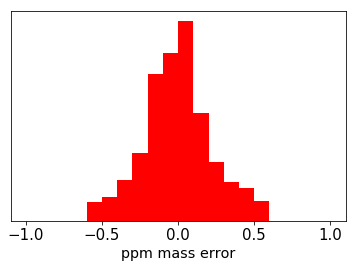

In [137]:
errors, num_compounds, mean_err, sdev_err, rms_err = plot_ppm_error(measured, reference, bins = 20)
lessthan1 = np.sum([np.abs(errors) <= 1.0])
print("Mean error (ppm): ", mean_err)
print("Standard dev (ppm): ", sdev_err)
print("Number of compounds: ", num_compounds)
print("RMS error(ppm): ", rms_err)
print('Compounds with error < 1 ppm: ', lessthan1)


In [138]:
with open('results_' + file.split('.')[0] + '.txt', 'w') as f:
    f.write("Number of compounds: %d" % num_compounds)
    f.write('\n')
    f.write("Mean error (ppm): %.8f"  % mean_err)
    f.write('\n')
    f.write("Standard dev (ppm): %.5f" % sdev_err)
    f.write('\n')
    f.write("RMS error(ppm): %.5f" % rms_err)
    f.write('\n')
    f.write('Average DBE: %.4f' % avg_dbe)
    f.write('\n')
    f.write('Compounds with error < 1 ppm: %d' % lessthan1)

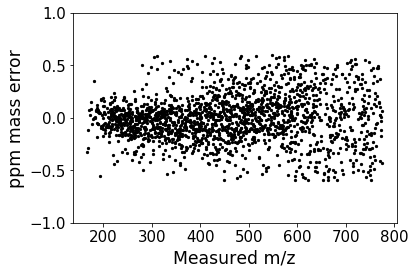

In [139]:
plt.scatter(measured, errors, s = 5, c = 'k')
plt.tick_params(axis = 'x', labelsize =15)
plt.xlabel("Measured m/z", fontsize = 'xx-large')
plt.tick_params(axis = 'y', labelsize =15)
plt.ylabel("ppm mass error", fontsize = 'xx-large')
plt.ylim((-1,1))
plt.gcf().subplots_adjust(bottom=0.15, left = 0.15 )
plt.savefig('scatter_' + file.split('.')[0] + '.png', dpi = 1200)

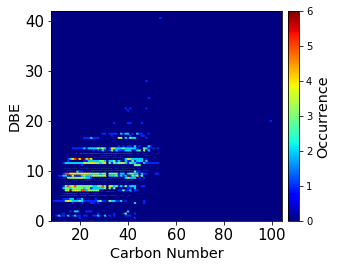

In [141]:
from matplotlib import cm 
from matplotlib import mlab

# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram
fig = plt.figure()
fig.set_size_inches(5.0, 4.0)
dbe = np.array(dfmzs['rdb'])
carbon_nums = np.array(carbon_nums)
res = plt.hexbin(carbon_nums, dbe, cmap=cm.jet, gridsize = (100,100))
m = max([carbon_nums.max(), dbe.max()])
plt.axis([carbon_nums.min(), carbon_nums.max(), dbe.min(), dbe.max()])
plt.tick_params(axis = 'x', labelsize =15)
plt.xlabel("Carbon Number", fontsize = 'x-large')
plt.tick_params(axis = 'y', labelsize =15)
plt.ylabel("DBE", fontsize = 'x-large')
plt.gcf().subplots_adjust(bottom=0.15)
cb = plt.colorbar(shrink = 1, pad = 0.025)
cb.set_label('Occurrence', fontsize = 'x-large')
#plt.savefig('DBEvsC_' + file.split('.')[0] + '.png', dpi = 1200)



In [142]:
# For atomic comsiderations only 

def bin_atom_number(atom_nums):
    int_bins = []
    for i in range(1, len(np.unique(atom_nums))):
        num = np.sum([atom_nums == i])

        int_bins.append(num)

        
    return int_bins
    
def bin_rel_abundance(atom_nums, intensity):

    abund_bins = []
    for i in range(1, len(np.unique(atom_nums))):

        abund = np.sum(intensity*[atom_nums == i])

        abund_bins.append(abund)
    
    
    return abund_bins

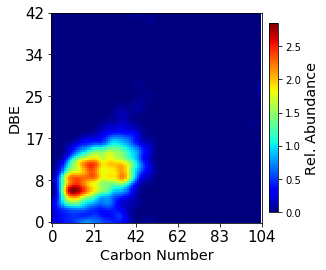

In [144]:
from scipy.ndimage.filters import gaussian_filter
def new_ticks(given_locs, edges):
    # Returns new ticks and labels for a matplotlib tick input
    n = len(given_locs[1:])
    labels = list(np.linspace(0, edges[-1], n).round().astype('int').astype('str'))
    return given_locs[1:], labels
    
def smooth_hist2d(x, y, s=2, bins=[100,100]):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    fig = plt.figure()
    fig.set_size_inches(5.0, 4.0)
    plt.imshow(heatmap.T, aspect = 'equal', origin='lower', cmap=cm.jet)
    xlocs, xlabels = new_ticks(plt.xticks()[0], xedges)
    ylocs, ylabels = new_ticks(plt.yticks()[0], yedges)
    plt.xticks(xlocs, xlabels)
    plt.yticks(ylocs, ylabels)
    plt.tick_params(axis = 'x', labelsize =15)
    plt.xlabel("Carbon Number", fontsize = 'x-large')
    plt.tick_params(axis = 'y', labelsize =15)
    plt.ylabel("DBE", fontsize = 'x-large')
    plt.gcf().subplots_adjust(bottom=0.15)
    cb = plt.colorbar(shrink = 0.9, pad = 0.025)
    cb.set_label('Rel. Abundance', fontsize = 'x-large')
    #plt.savefig('DBEvsC_Blur' + file.split('.')[0] + '.png', dpi = 1200)
    return heatmap.T, extent, plt.xticks(), plt.yticks(), xedges, yedges
h, e, xt, yt, xe, ye = smooth_hist2d(carbon_nums, dbe)


In [106]:
['-20'] + list(np.linspace(0, xe[-1], 7).round().astype('int').astype('str'))


['-20', '0', '7', '14', '21', '28', '35', '42']

In [86]:

new_ticks(yt[0], ye)    

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 ['-20', '0', '3', '6', '9', '12', '16'])

In [231]:
def extract_hetero_num(df):
    N = []
    S = []
    O = []
    l = df.tolist()
    for formula in l:
        if 'N' in formula:
            num = formula.split('N')[1]
            if num == '':
                N.append(1)
            elif num[0].isdigit():
                N.append(int(num[0]))
            else:
                
                N.append(1)     
        else:
            N.append(0)
        if 'S' in formula:
            num = formula.split('S')[1]
            if num == '':
                S.append(1)
            elif num[0].isdigit():
                S.append(int(num[0]))
            else:
                S.append(1)     
        else:
            S.append(0)
        if 'O' in formula:
            num = formula.split('O')[1]
            if num == '':
                O.append(1)
            elif num[0].isdigit():
                O.append(int(num[0]))
            else:
                O.append(1)     
        else:
            O.append(0)
    return N,S,O

In [232]:
N, S, O = extract_hetero_num(dfmzs['Ion Formula'])

In [233]:
countN = np.array(bin_atom_number(np.array(N)))
countO = np.array(bin_atom_number(np.array(O)))/num_compounds
countS = np.array(bin_atom_number(np.array(S)))/num_compounds


intensity = np.array(dfmzs['I']/dfmzs['I'].sum())

abundN = np.array(bin_rel_abundance(np.array(N), intensity))
abundO = np.array(bin_rel_abundance(np.array(O), intensity))
abundS = np.array(bin_rel_abundance(np.array(S), intensity))
print(abundN)
print(abundO)
print(abundS)

[0.06723744 0.00099481 0.00023569 0.00055632 0.00037523 0.00154435]
[4.77774735e-02 9.21041939e-03 5.17511046e-03 1.68459634e-04
 3.95254253e-04 5.71610831e-05 0.00000000e+00 5.71899969e-05]
[0.07760168 0.00206176]


In [ ]:
'''
width = 0.3

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(1, len(abundO)+1), countO, width, color='k')
rects2 = ax.bar(np.arange(1, len(abundN)+1) + width, countN, width, color='C1')
rects3 = ax.bar(np.arange(1, len(abundS)+1) + width*2, countS, width, color='C9')

ax.set_ylabel('Fraction of Assigned Formulas')
ax.set_xlabel('Heteroatom Number')
ax.set_xticks(np.arange(1, len(countO)+1)+width)
ax.set_xticklabels(list(np.arange(1, len(countO)+1).astype('str')))
ax.legend( (rects1[0], rects2[0], rects3[0]), ('O', 'N', 'S') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

        
#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)

plt.savefig('heteroatoms' + file.split('.')[0] + '.png', dpi = 1200)
'''

In [240]:
# Taken from Smith et al. 2018 DOI: 10.1021/acs.analchem.7b04159
class_list1 = ['HC', 'N', 'NO','NO2','NO3','NO4','NO5','NOS', 
              'NO2S', 'NO3S', 'NO4S', 'NOS2', 'NS', 'NS2',
             'N2', 'N2O', 'N2O2', 'N2S', 'N2OS', 'OS', 'O2S', 
              'O3S', 'O4S', 'O5S', 'OS2', 'O2S2', 'O3S2', 'O4S2', 
              'O', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7' ]
def get_class(formula):
    if 'N' in formula:
        cl = 'N' + formula.split('N')[1]
    elif 'O' in formula:
        cl = 'O' + formula.split('O')[1]
    elif 'S' in formula:
        cl = 'S' + formula.split('S')[1]
    else:
        cl = 'HC'
    return cl

def assign_class(formulas):
    cl_list = []
    for f in formulas:
        cl = get_class(f)
        cl_list.append(cl)
    
    cl_list = np.array(cl_list)
    
    return cl_list
    

        
    
    
def determine_class_abund(formulas, intensity, ref_list):
    cl_list = assign_class(formulas) # list of classes (np.array)
    unique_classes = np.unique(cl_list) # Unique assignments in sample
    # List corresponding to publishing standard by comparison with a reference list.
    pub_list = list(set(unique_classes) and set(ref_list)) 
    
    abund_bins = []
    for cl in pub_list:

        abund = np.sum(intensity*[cl_list == cl])
        abund_bins.append(abund)
    
    return np.array(abund_bins), np.array(pub_list)
    
def make_subscripts(labels):
    SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

    for i in range(len(labels)):
        if not labels[i].isalpha():
            labels[i] = labels[i].translate(SUB)
    return labels
    
        
    

['HC' 'N' 'N2' 'N2O' 'N2O2' 'N2OS' 'N2S' 'NO' 'NO2' 'NO2S' 'NO3' 'NO3S'
 'NO4' 'NO4S' 'NO5' 'NOS' 'NOS2' 'NS' 'NS2' 'O' 'O2' 'O2S' 'O2S2' 'O3'
 'O3S' 'O3S2' 'O4' 'O4S' 'O4S2' 'O5' 'O5S' 'O6' 'O7' 'OS' 'OS2']


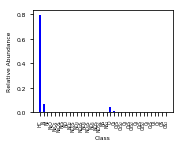

In [237]:
formulas = np.array(dfmzs['Ion Formula'])
abund_bins, labels = determine_class_abund(formulas, intensity, class_list1)
inds = np.argsort(labels)[::1]
abund_bins = abund_bins[inds]
labels = labels[inds]

labels = make_subscripts(labels)

width = 0.5

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(3.25, 2.45)
rects1 = ax.bar(np.arange(len(abund_bins)), abund_bins, width, color='b')
ax.set_ylabel('Relative Abundance', fontsize = 6)
ax.set_xlabel('Class', fontsize = 6)
ax.set_xticks(np.arange(len(labels)))
plt.setp(ax.get_xticklabels(), rotation = 90, fontsize=4.5)
plt.setp(ax.get_yticklabels(), fontsize=6)
ax.set_xticklabels(list(labels))
plt.gcf().subplots_adjust(bottom=0.30)
plt.gcf().subplots_adjust(left=0.30)
#ax.legend( (rects1[0], rects2[0], rects3[0]), ('O', 'N', 'S') )
plt.savefig('classdist_' + file.split('.')[0] + '.png', dpi = 1200)

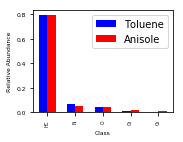

In [261]:

def reduce_classes(labels, abunds, keep_list):
    new_labels = []
    new_abunds = []
    for i in range(len(labels)):
        if labels[i] in keep_list:
            new_labels.append(labels[i])
            new_abunds.append(abunds[i])
    
    return new_labels, new_abunds
        




# Now make a comparison bar chart.
file2 = '000008_1000msig_full_010.csv'
df2 = pd.read_csv(file2)
dfmzs2 = df2[pd.notnull(df2['Meas. m/z'])]

intensity2 = np.array(dfmzs2['I']/dfmzs2['I'].sum())
formulas2 = np.array(dfmzs2['Ion Formula'])
abund_bins2, labels2 = determine_class_abund(formulas2, intensity2, class_list1)
inds2 = np.argsort(labels2)[::1]
abund_bins2 = abund_bins2[inds2]
labels2 = labels2[inds2]

labels2 = make_subscripts(labels2)
keep_list = make_subscripts(['HC', 'N', 'O', 'O2', 'O3'])
labels, abund_bins = reduce_classes(labels, abund_bins, keep_list)
labels2, abund_bins2 = reduce_classes(labels2, abund_bins2, keep_list)




width = 0.3

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(3.25, 2.45)
rects1 = ax.bar(np.arange(len(abund_bins)), abund_bins, width, color='b')
rects2 = ax.bar(np.arange(len(abund_bins2)) + width, abund_bins2, width, color='r')
ax.set_ylabel('Relative Abundance', fontsize = 6)
ax.set_xlabel('Class', fontsize = 6)
ax.set_xticks(np.arange(len(labels)) + width/2)

plt.setp(ax.get_xticklabels(), rotation = 90, fontsize=4.5)
plt.setp(ax.get_yticklabels(), fontsize=6)
ax.set_xticklabels(list(labels))
plt.gcf().subplots_adjust(bottom=0.30)
plt.gcf().subplots_adjust(left=0.30)
ax.legend((rects1[0], rects2[0]), ('Toluene', 'Anisole'))
plt.savefig('classdistCOMP_TolAni' + '.png', dpi = 1200)


In [254]:
len(dfmzs2)

920

In [12]:
dfmzs['Ion Formula'].reset_index()

,index,Ion Formula
0,0,C6H4O2
1,5,C6H5O2
2,11,C6H7O2
3,17,C5H7O3
4,22,C8H10O
5,27,C7H10NO
6,33,C7H10O2
7,38,C6H7O3
8,44,C8H7O2
9,50,C8H8O2


In [7]:
def hc_dbe(df):
    df = df.reset_index()
    dbes = []
    ints = []
    for i in range(len(df)):
        formula = df['Ion Formula'][i]
        if ('N' in formula) or ('O' in formula) or ('S' in formula):
            continue
        else:
            dbes.append(df['rdb'][i])
            ints.append(df['I'][i])
    return np.array(dbes), np.array(ints)


            

In [16]:
dbes, ints = hc_dbe(dfmzs)
I = ints/np.sum(ints)
avg_dbe = np.sum(dbes*I)/np.sum(I)
print(avg_dbe)

9.451498196732315
